
This is the lstm model for forecasting kospi volatility

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import data_reader as dr


In [2]:
data= dr.read()
data = data.dropna()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2321 entries, 22 to 2483
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 2321 non-null   object 
 1   Daily_trading_range  2321 non-null   float64
 2   Log_Volume_change    2321 non-null   float64
 3   Daily_return         2321 non-null   float64
 4   Daily_log_return     2321 non-null   float64
 5   Index                2321 non-null   float64
 6   Past_vol22           2321 non-null   float64
 7   gold                 2321 non-null   float64
 8   oil                  2321 non-null   float64
 9   Target22             2321 non-null   float64
 10  Target10             2321 non-null   float64
dtypes: float64(10), object(1)
memory usage: 217.6+ KB


In [4]:
data = data.drop(['Daily_return','Past_vol22'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2321 entries, 22 to 2483
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 2321 non-null   object 
 1   Daily_trading_range  2321 non-null   float64
 2   Log_Volume_change    2321 non-null   float64
 3   Daily_log_return     2321 non-null   float64
 4   Index                2321 non-null   float64
 5   gold                 2321 non-null   float64
 6   oil                  2321 non-null   float64
 7   Target22             2321 non-null   float64
 8   Target10             2321 non-null   float64
dtypes: float64(8), object(1)
memory usage: 181.3+ KB


In [5]:
x_values = data.iloc[:, 1:-2]
y_values = data[['Target22']]
y_values = y_values.iloc[:]

In [6]:
x_values.info()
y_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2321 entries, 22 to 2483
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Daily_trading_range  2321 non-null   float64
 1   Log_Volume_change    2321 non-null   float64
 2   Daily_log_return     2321 non-null   float64
 3   Index                2321 non-null   float64
 4   gold                 2321 non-null   float64
 5   oil                  2321 non-null   float64
dtypes: float64(6)
memory usage: 126.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2321 entries, 22 to 2483
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Target22  2321 non-null   float64
dtypes: float64(1)
memory usage: 36.3 KB


In [11]:
x_values.head(200)

,Daily_trading_range,Log_Volume_change,Daily_log_return,Index,gold,oil
22,15.260010,14.632111,0.009260,2070.080078,1422.599976,91.550003
23,16.019776,16.086549,0.007249,2085.139893,1378.500000,89.379997
24,10.219971,-7.434844,-0.001243,2082.550049,1373.400024,90.300003
25,30.549804,5.468045,-0.002375,2077.610107,1371.400024,88.379997
26,17.540039,-19.485688,0.004126,2086.199951,1368.500000,88.029999
...,...,...,...,...,...,...
217,22.270020,-12.806827,-0.014190,1838.900024,1659.699951,85.809998
218,21.550049,4.974650,0.009213,1855.920044,1681.300049,85.570000
219,66.390015,2.641280,-0.027770,1805.089966,1667.300049,84.230003
220,34.089966,1.732260,0.018274,1838.380005,1681.800049,86.800003


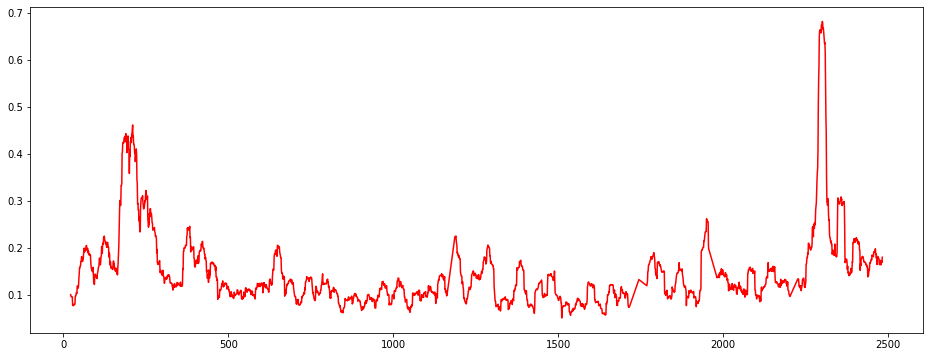

In [23]:
plt.figure(1, figsize=(16,6))
plt.plot(y_values, color='red')

In [24]:
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(x_values)
scaled_y = scaler.fit_transform(y_values)

In [28]:
y_values

,Target22
22,0.100634
23,0.096924
24,0.096255
25,0.096386
26,0.096175
...,...
2479,0.164065
2480,0.172634
2481,0.171360
2482,0.169037


In [29]:
split = int(len(x_values)*0.8)

In [30]:
window = 22
trainX = np.array(scaled_x[:split])
testX = np.array(scaled_x[split:])
trainY = np.array(scaled_y[:split])
testY = np.array(scaled_y[split:])

trainX.shape

(1856, 6)

In [31]:
Xtrain = []
ytrain = []
Xtest = []
ytest = []

for i in range(window, len(trainX)):
    Xtrain.append(trainX[i-window:i, :trainX.shape[1]])
    ytrain.append(trainY[i])
for i in range(window, len(testX)):
    Xtest.append(testX[i-window:i, :testX.shape[1]])
    ytest.append(testY[i])

In [32]:
Xtrain, ytrain = (np.array(Xtrain), np.array(ytrain))
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[2]))

Xtest, ytest = (np.array(Xtest), np.array(ytest))
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], Xtest.shape[2]))

In [33]:

print(Xtrain.shape)
print(ytrain.shape)
print("-----")
print(Xtest.shape)
print(ytest.shape)

(1834, 22, 6)
(1834, 1)
-----
(443, 22, 6)
(443, 1)


In [42]:
print(Xtrain)

[[[0.05668713 0.51816984 0.5695626  0.43256611 0.37153987 0.85233573]
  [0.06086856 0.51970406 0.55774495 0.44320285 0.32747074 0.83801793]
  [0.02894888 0.49489247 0.50784862 0.44137365 0.32237433 0.84408817]
  ...
  [0.10550318 0.51754565 0.49528145 0.4592572  0.28280205 0.85655847]
  [0.08271895 0.47611931 0.40785567 0.43231884 0.28859792 0.84718921]
  [0.05432097 0.49234549 0.5216778  0.43394336 0.28050361 0.84778306]]

 [[0.06086856 0.51970406 0.55774495 0.44320285 0.32747074 0.83801793]
  [0.02894888 0.49489247 0.50784862 0.44137365 0.32237433 0.84408817]
  [0.14083572 0.50850311 0.50119657 0.43788457 0.32037573 0.83141988]
  ...
  [0.08271895 0.47611931 0.40785567 0.43231884 0.28859792 0.84718921]
  [0.05432097 0.49234549 0.5216778  0.43394336 0.28050361 0.84778306]
  [0.11634641 0.50094255 0.54262355 0.4408015  0.30128911 0.84567169]]

 [[0.02894888 0.49489247 0.50784862 0.44137365 0.32237433 0.84408817]
  [0.14083572 0.50850311 0.50119657 0.43788457 0.32037573 0.83141988]
  [0

In [41]:
print(ytrain)

[[0.10211872]
 [0.10062409]
 [0.1111112 ]
 ...
 [0.13776567]
 [0.13623368]
 [0.15021518]]


In [36]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, GRU
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
from tensorflow import keras
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from keras.wrappers.scikit_learn import KerasRegressor
from keras import backend as K

In [37]:
def create_model(activation='tanh', neurons1=1, neurons2=1, neurons3=1):
    if(K.backend() == 'tensorflow'):
        K.clear_session()
    model = Sequential()
    model.add(LSTM(units=2, return_sequences=False, input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
    model.add(Dropout(0.2))
    # if(n_layers==1):
    #     model.add(LSTM(units=n_units, return_sequences=False, input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
    # else:
    #     for i in range(n_layers):
    #         if(i==0):
    #             model.add(LSTM(n_units, return_sequences=True, input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
    #             continue
    #         if(i== n_layers-1):
    #             model.add(LSTM(n_units, return_sequences=False))
    #         else:
    #             model.add(LSTM(n_units, return_sequences=True))
    # model.add(LSTM(units=4, return_sequences=False))
    # model.add(Dropout(0.7))
    model.add(Dense(neurons1, activation=activation))
    model.add(Dense(neurons2, activation=activation))
    model.add(Dense(neurons3, activation=activation))
    model.add(Dense(1))
    opt = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='mean_squared_error', optimizer=opt)
    return model
# model.fit(Xtrain, ytrain, batch_size=16, epochs=150, validation_split=0.1, shuffle=False)

In [38]:
model = create_model(neurons1=5, neurons2=20, neurons3=5)
model.fit(Xtrain, ytrain, batch_size=16, epochs=150)

Epoch 1/150
115/115 [==============================] - 4s 7ms/step - loss: 0.0138

In [39]:
forecast = model.predict(Xtest)
rev_forecast = scaler.inverse_transform(forecast)
rev_ytest = scaler.inverse_transform(ytest)

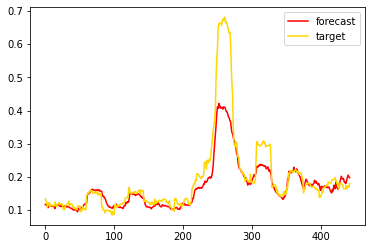

In [40]:
plt.plot(rev_forecast, color='red', label='forecast')
plt.plot(rev_ytest, color='gold', label='target')
plt.legend()
# plt.savefig("images/single_layer_model_pred.png")

plt.show()

In [100]:
# previous_model = keras.models.load_model('models/multi_layer_lstm_model')
regressor = KerasRegressor(build_fn=create_model, epochs=150, verbose=0,batch_size=16)

In [101]:
tscv = TimeSeriesSplit(n_splits=3)
params = dict(neurons1=[2,5,10,20,32],
              neurons2=[2,5,10,20,32],
              neurons3=[2,5,10,20,32],
              )
grid = GridSearchCV(estimator=regressor, param_grid=params, verbose=10,cv=tscv)
grid_result = grid.fit(Xtrain,ytrain)

Fitting 3 folds for each of 125 candidates, totalling 375 fits
[CV 1/3; 1/125] START neurons1=2, neurons2=2, neurons3=2........................
[CV 1/3; 1/125] END ......neurons1=2, neurons2=2, neurons3=2; total time=  33.4s
[CV 2/3; 1/125] START neurons1=2, neurons2=2, neurons3=2........................
[CV 2/3; 1/125] END ......neurons1=2, neurons2=2, neurons3=2; total time= 1.0min
[CV 3/3; 1/125] START neurons1=2, neurons2=2, neurons3=2........................
[CV 3/3; 1/125] END ......neurons1=2, neurons2=2, neurons3=2; total time= 1.6min
[CV 1/3; 2/125] START neurons1=2, neurons2=2, neurons3=5........................
[CV 1/3; 2/125] END ......neurons1=2, neurons2=2, neurons3=5; total time=  33.0s
[CV 2/3; 2/125] START neurons1=2, neurons2=2, neurons3=5........................
[CV 2/3; 2/125] END ......neurons1=2, neurons2=2, neurons3=5; total time= 1.0min
[CV 3/3; 2/125] START neurons1=2, neurons2=2, neurons3=5........................
[CV 3/3; 2/125] END ......neurons1=2, neurons2

In [102]:
grid_forecast = grid_result.predict(Xtest)
print('Best score is: {} using {}'.format(grid_result.best_score_, grid_result.best_params_))

Best score is: -0.0017036532517522573 using {'neurons1': 5, 'neurons2': 20, 'neurons3': 5}


In [105]:
grid_forecast = grid_forecast.reshape(grid_forecast.shape[0],1)
rev_gridforecast = scaler.inverse_transform(grid_forecast)
rev_ytest = scaler.inverse_transform(ytest)

In [117]:
import metrics as mt

In [118]:
mt.testScore(rev_gridforecast, rev_ytest)

test Score: 0.005088783065468802 MSE
test Score: 0.07133570680570006 RMSE
test Score: 0.13529914938825457 MAPE
test Score: 0.6754746233871319 R2 score


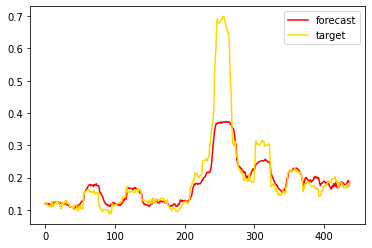

In [106]:
plt.plot(rev_gridforecast, color='red', label='forecast')
plt.plot(rev_ytest, color='gold', label='target')
plt.legend()
# plt.savefig("images/single_layer_model_pred.png")

plt.show()


In [139]:
model = Sequential()
model.add(LSTM(2, return_sequences=False,input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(5, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=opt)
model.fit(Xtrain, ytrain, epochs=150, batch_size=16)

Epoch 1/150
114/114 [==============================] - 3s 8ms/step - loss: 0.0140

In [140]:
forecast = model.predict(Xtest)

In [141]:
rev_forecast = scaler.inverse_transform(forecast)
rev_ytest = scaler.inverse_transform(ytest)

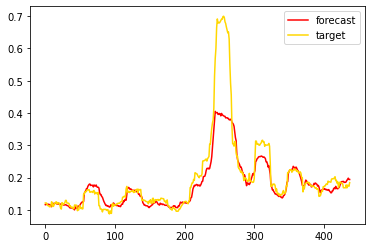

In [142]:
plt.plot(rev_forecast, color='red', label='forecast')
plt.plot(rev_ytest, color='gold', label='target')
plt.legend()
# plt.savefig("images/single_layer_model_pred.png")

plt.show()

In [143]:
testScore = mean_squared_error(rev_ytest, rev_forecast)
print("test Score: {score} MSE".format(score=testScore))
root_testScore = mean_squared_error(rev_ytest, rev_forecast, squared=False)
print("test Score: {score} RMSE".format(score=root_testScore))
mape = mean_absolute_percentage_error(rev_ytest, rev_forecast)
print("test Score: {score} MAPE".format(score=mape))

test Score: 0.0043387220674402675 MSE
test Score: 0.06586897651732769 RMSE
test Score: 0.11055319772528241 MAPE


In [60]:
# model.save("models/single_layer_lstm_model")

## Experiment settings

Dataset: KOSPI index from Jan, 2011 to Dec, 2020\
Included data in default: Daily log return, Daily trading range, Log volume change\
Additional data for hybrid: Next prediction by GARCH and GJR-GARCH

- Loss function: mean_squared_error
- Optimizer: Adam
- epochs: 20
- batch_size: 16

## Experiment results


- Single-layer lstm model (32 units)
    * Training error: 0.0042, Validation error: 0.0031
    * MSE: 0.0032
    * RMSE: 0.0568
    * MAPE 0.1912

![title](images/single_layer_model_pred.png)

- Multi-layer lstm model (32 units, dropout 0.3, 32 units)
    * Training error: 0.0045, Validation error: 0.0024
    * MSE: 0.0023
    * RMSE 0.0484
    * MAPE: 0.1701
    
![title](images/multi_layer_model_pred.png)

- Single-layer hybrid model (32 units)
    * Training error: 0.0016, Validation error: 0.0001
    * MSE: 0.0007
    * RMSE: 0.0269
    * MAPE: 0.0924

![title](images/single_layer_hybrid_pred.png)

- Multi-layer hybrid model (32 units, dropout 0.3, 32 units)
    * Training error: 0.0024, Validation error: 0.0001
    * MSE: 0.0008
    * RMSE: 0.0274
    * MAPE: 0.0935
    
![title](images/multi_layer_hybrid_pred.png)